In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [31]:
data_path = "/scratch/groups/horence/JuliaO/single_cell/SZS_pipeline2/data/"
ind = "P3"
dataname = "HLCA4_{}_10x_with_postprocessing_lung".format(ind)
ind_dict = {"P2" : "Individual 1", "P3" : "Individual 2"}
df = pd.read_parquet("{}{}.pq".format(data_path,dataname),columns=["cell","numReads","tissue","compartment","free_annotation","geneR1A_uniq"])

In [32]:
df["cell type"] = df["tissue"] + df["compartment"] + df["free_annotation"]

In [33]:
df["number of spliced reads per cell"] = df.groupby("cell")["numReads"].transform("sum")

In [34]:
df["number of genes with detected splicing\nper cell"] = df["cell"].map(df.groupby("cell")["geneR1A_uniq"].nunique())

In [35]:
df = df.drop_duplicates("cell")

In [36]:
df["med_numreads"] = df["cell type"].map(df.groupby("cell type")["number of spliced reads per cell"].median())

In [37]:
df = df.sort_values("med_numreads")

In [38]:
in_order = list(df["cell type"].drop_duplicates())

In [39]:
df["number of spliced reads per cell"].max()

213044

In [40]:
ser = df.groupby("cell type")["cell"].nunique()
ser

cell type
lungendothelialArtery                                  308
lungendothelialBronchial Vessel 1                      328
lungendothelialBronchial Vessel 2                      132
lungendothelialCapillary                              1434
lungendothelialCapillary Aerocyte                      815
lungendothelialLymphatic                               180
lungendothelialVein                                    199
lungepithelialAlveolar Epithelial Type 1               656
lungepithelialAlveolar Epithelial Type 2              2785
lungepithelialBasal                                    231
lungepithelialCiliated                                 488
lungepithelialClub                                     641
lungepithelialDifferentiating Basal                    202
lungepithelialGoblet                                   159
lungepithelialIonocyte                                  22
lungepithelialMucous                                   133
lungepithelialNeuroendocrine                  

In [41]:
ser = ser.reindex(in_order)

In [42]:
ser.iloc[0]

1434

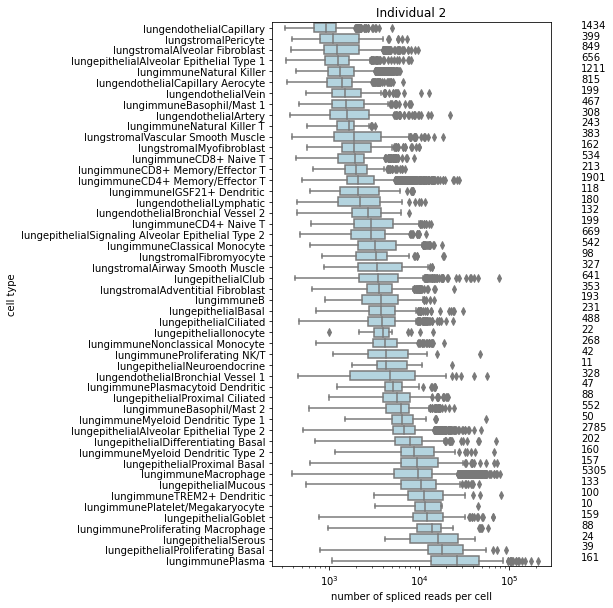

In [43]:
f, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(data=df, x="number of spliced reads per cell",y="cell type",color="lightblue")
plt.title(ind_dict[ind])
plt.xscale("log")

for i in range(ser.shape[0]):
  plt.text(df["number of spliced reads per cell"].max()*3, i, ser.iloc[i])  
plt.savefig("{}{}_numreads_percell.pdf".format(outpath,ind),bbox_inches="tight")
plt.savefig("{}{}_numreads_percell.png".format(outpath,ind),bbox_inches="tight")

plt.show()

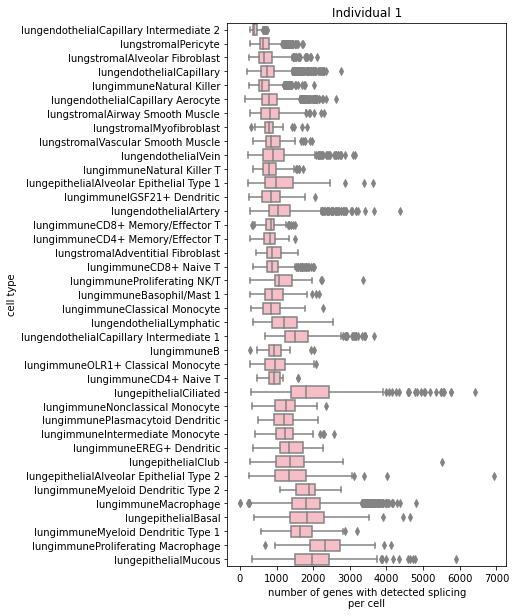

In [18]:
f, ax = plt.subplots(figsize=(5, 10))
sns.boxplot(data=df, x="number of genes with detected splicing\nper cell",y="cell type",color="lightpink")
plt.title(ind_dict[ind])
# plt.xscale("log")
plt.savefig("{}{}_numgenes_percell.png".format(outpath,ind),bbox_inches="tight")

plt.show()